# 3F8 Lab - Inference

## Alex Darch – ad806
## St John’s College
## 21/03/2018

In [607]:
import matplotlib.pyplot as plt
import scipy.optimize
import numpy as np
import sys 

## Given Functions

In [398]:
##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data_internal(X, y):
    x_min, x_max = X[ : , 0 ].min () - 0.5 , X[ : , 0 ].max () + 0.5
    y_min, y_max = X[ : , 1 ].min () - 0.5 , X[ : , 1 ].max () + 0.5
    xx, yy = np.meshgrid (np.linspace (x_min , x_max , 100) , np.linspace (y_min , y_max , 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0 , 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1 , 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data (X, y):
    xx, yy = plot_data_internal (X, y)
    plt.show()


##
# x: input to the logistic function
def logistic(x): return 1.0/(1.0 + np.exp(-x))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
def compute_average_ll(X, y, w):
    output_prob = logistic (np.dot(X, w))
    return np.mean (y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


##
# ll: 1d array with the average likelihood per data point and dimension equal
# to the number of training epochs.
def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log - likelihood')
    plt.title('Plot Average Log - likelihood Curve')
    plt.show()


##
# x: 2d array with input features at which to compute predictions.
# (uses parameter vector w which is defined outside the function's scope)
def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict : function that recives as input a feature matrix and returns a 1d
# vector with the probability of class 1.
def plot_predictive_distribution(X, y, predict):
    xx , yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z = Z.reshape(xx. shape )
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()
    
    ##
# l: hyper - parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
def expand_inputs(l, X, Z):

    X2 = np.sum(X**2 , 1)   #squared every element and then sums the two columns into one "radial squared distance"
    Z2 = np.sum(Z**2 , 1)
    ones_Z = np.ones (Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2 , ones_Z ) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

##
# x: 2d array with input features at which to compute the predictions using the feature expansion
# ( uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion , which are defined outside the function's scope )
def predict_for_plot_expanded_features(x):  #x s sze (10000,2)
    x_expanded = expand_inputs(l, x, centers)
    x_tilde = np.concatenate(( x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))

## Section A, B & C

### Derivation of the gradient of the log-likelihood

Using the classification

$$ y_n = \begin{cases}
    1,       & \quad \text{Class A}\\
    0,       & \quad \text{Class B}
  \end{cases} $$
  
The likelihood probability of the dataset is given by the product of bernoulli distributions:

$$\begin{equation}
p(\textbf y \, | \,\boldsymbol \beta \,, \tilde{\textbf X}) = \prod_{n=0}^{N} \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})^{y_n}(1-\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n}))^{1-y_n}
\end{equation} $$
   
where
$$\begin{equation}
\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n}) = \frac{1}{1+e^{-\boldsymbol \beta^T \tilde{\textbf x}_{n}}},
\,\,\, \text{and therefore}, \,\,\,
\frac{\partial \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})}{\partial \boldsymbol{\beta}}
= \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})[1-\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})]\tilde{\textbf x}
\end{equation}$$

Taking the log of the likelihood, $log[p(\textbf y \, | \,\boldsymbol \beta \,, \tilde{\textbf X})] \,\, \mathcal{L}(\boldsymbol \beta),$ <br> 

$$\begin{equation}
\mathcal{L}(\boldsymbol \beta) = 
\sum_{n=0}^{N} \, y_n ln[\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})] \, + \,(1-y_n)ln[1-\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})]
\end{equation}$$

and differentiating with respect to $\boldsymbol \beta$<br>

$$\begin{equation}
\frac{\partial}{\partial \boldsymbol{\beta}} \mathcal{L}(\boldsymbol \beta) = \sum_{n=0}^{N} \,
y_n \frac{1}{\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})} \frac{\partial }{\partial \boldsymbol{\beta}}\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n}) \,\, + \,\,
(1- y_n) \frac{1}{(1 - \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n}))} \frac{\partial }{\partial \boldsymbol{\beta}}(1 - \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n}))
\end{equation}$$

$$\begin{equation}
 = \sum_{n = 0}^{N} [y_n - \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n} )]\tilde{\textbf x}_{n}
\end{equation}$$

<br> 

This is the gradient of log-likelihood of the parameters


### Pseudo code for computing $\beta$

iterations = 500 <br>
learning_rate = $\alpha$ <br>
$\tilde{\textbf X} = \textbf (\textbf X_{training}, \text{ones(number of rows of} \,\, \textbf X_{training}))$ <br>
$\boldsymbol \beta_{initial} \,\,  = \,\, \text{randomise}([\beta_0, \,\, \beta_1, \,\, \beta_2]^T)$
<br>


for n in range(0, iterations): <br>
$\,\,\,\,\,\,\,\,  \frac{\partial}{\partial \boldsymbol{\beta}} \mathcal{L}(\beta_{old}) = [\textbf y_{training} - \sigma(\boldsymbol \beta^T \tilde{\textbf X})]^T \, \tilde{\textbf X} $ <br>
$\,\,\,\,\,\,\,\,  \beta_{new} = \beta_{old} + \alpha \, \cdotp \frac{\partial}{\partial \boldsymbol{\beta}} \mathcal{L}(\beta_{old})$
        

The learning rate, $\alpha$, is chosen based on the number of iterations of beta that you go through. A high learning rate has the problem of overshooting, so the rate must be kept fairly low. Very low learning rates take a large number of iterations to get to a maximum log-likelihood, but a large number of iterations may also cause over training of your classifier leading to decreased performance against
test results. Therefore, a reasonable number of iterations with a sufficiently low (but not too low) learning rate is ideal.

plot all data


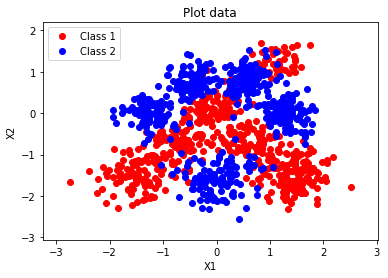

In [399]:
## A, B, C - Preliminary Maths, Load and visualise data
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')
X_tilde = np.append(X, np.ones((1000,1)), axis=1) #create X_tilde

print("plot all data")
plot_data(X, y)

A classifier with a linear class boundary is unlikely to perform well on this data set because the data is not linear – it is spread out into “groups” on a two dimensional surface.

## Section D

In [400]:
#####################
## D - split data set

Num_train = 700
X_training =  X[0:Num_train,:]
y_training = y[0:Num_train]

X_test = X[Num_train:,:]
y_test = y[Num_train:]

X_tilde_train = np.concatenate((X_training, np.ones((X_training.shape[0], 1))), 1)
X_tilde_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), 1)

The data sets are split into a training set of length 700 and test set of length 300. Ideally, we want the training data to be large so that the model can train well, but we also want the test set to be large so that we can test whether the model has been trained well. Therefore choosing a size is a trade off between the two.

700 was chosen because there are only 1000 datapoints so something slightly larger than 50% was chosen so that the model can be trained well.

## Section E

In [490]:
def gradient(X_, y_, beta_):
    sigma = logistic(np.dot(X_, beta_))
    return np.dot((y_ - sigma), X_)

def train(y_train, X_t_train, y_t, X_tilde_t, alpha):
    iterations = 500
    
    #initialise log likelyhood array for training and test data
    ll_training = np.zeros([iterations]); ll_test = np.zeros([iterations])     
    beta = np.random.randn(X_t_train.shape[1])

    #gradient ascent to train data
    for n in range(0, iterations):
        
        gradients = gradient(X_t_train, y_train, beta)
        beta = beta + alpha*gradients
        
        ll_training[n] = compute_average_ll(X_t_train, y_train, beta) # compute log likelyhood of each iteration
        ll_test[n] = compute_average_ll(X_tilde_t, y_t, beta)
        
        
    print("\nplot log likelihood of training data as \na function of the number of iterations")
    plot_ll(ll_training)
    print("\nplot log-likelihood of test data (using \n gradients calculated from training data) vs iterations")
    plot_ll(ll_test)
    
    #note [-1] gives the last element in an array
    print("Final training log-likelihood per data point = " +  str(ll_training[-1]))   
    print("Final test log-likelihood per data point = " +  str(ll_test[-1]))

    return beta


plot log likelihood of training data as 
a function of the number of iterations


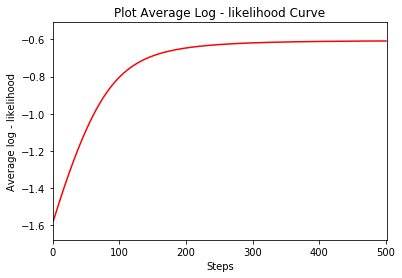


plot log-likelihood of test data (using 
 gradients calculated from training data) vs iterations


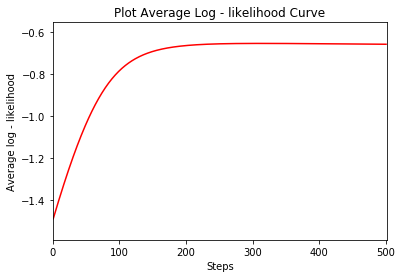

Final training log-likelihood per data point = -0.608548411267
Final test log-likelihood per data point = -0.658874127516

plot probability contours on training data


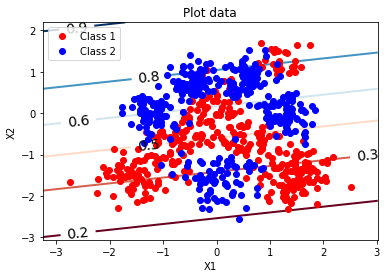


plot probability contours on test data


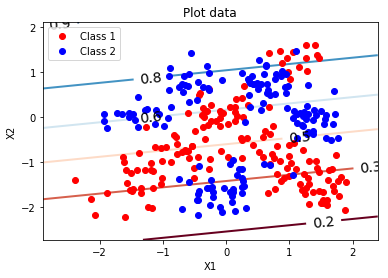

In [491]:
###################################################
## E - train classifier and plot probability contours

rate = 0.00005
beta = train(y_training, X_tilde_train, y_test, X_tilde_test, rate)
w = beta

#note that "predict for plot" generates X_tilde therefore only send X_training, not X_tilde_train
print("\nplot probability contours on training data")
plot_predictive_distribution(X_training, y_training, predict_for_plot)  #plot linear classifiers on plot
print("\nplot probability contours on test data")
plot_predictive_distribution(X_test, y_test, predict_for_plot) 

## Section F

In [492]:
def confusion_matrix(y, X_tilde, beta = None):
    #apply thresholds to test data, use logistic classification from part A
    # p(y(n) = 1 | x_tilde(n)) = sigma(beta.T * x_tilde(n))
    # p(y(n) = 0 | x_tilde(n)) = 1 - sigma(beta.T * x_tilde(n))
    #use if p(y(n) | x_tilde(n)) > 0.5 then y(n) = 1
    
    #the logistic function just transforms weighted data to be between 0 and 1
    if np.all(beta != None):
        prob_y = logistic(np.dot(beta, X_tilde.T))
    else:
        prob_y = predict_for_plot_laplace_features(X_tilde) #probabilities for the ftr
    
    #threshold each value of prob_y and if >0.5 assign assigned_y a value of 1 (true)
    assigned_y = []
    for n in range(0, len(y)):
        if prob_y[n] > 0.5:
            assigned_y.append(1)
        else:
            assigned_y.append(0)
            
    #compare assigned_y to true_y     
    true_negatives = 0; true_positives = 0; false_negatives = 0; false_positives = 0
    total_pos = 0
    
    for n in range(0, len(y)):
        #count the total number of negatives & positives
        if y[n] == 1: total_pos += 1
        
        #count the number of true_positives etc
        if (assigned_y[n] == 1) and y[n] == 1:
            true_positives += 1
        elif (assigned_y[n] != 1) and y[n] == 1:
            false_negatives += 1
        elif (assigned_y[n] == 0) and y[n] == 0:
            true_negatives += 1
        else:
            false_positives += 1
            
    #divide by number of tests to get fractions
    true_negatives /= (len(y) - total_pos); true_positives /= total_pos; 
    false_negatives /= total_pos; false_positives /= (len(y) - total_pos)
    
    print("Confusion Matrix:\n")
    print("True negative/total negatives  = {}   |   False positive/total negatives = {}".format(true_negatives,false_positives))
    print("False negative/total positives = {}   |   True positive/total positives  = {}".format(false_negatives,true_positives))


In [493]:
######################
## F- confusion matrix
confusion_matrix(y_test, X_tilde_test, beta)

Confusion Matrix:

True negative/total negatives  = 0.6815286624203821   |   False positive/total negatives = 0.3184713375796178
False negative/total positives = 0.34965034965034963   |   True positive/total positives  = 0.6503496503496503


For the linear classifier, the final log likelihoods are:

Average training log-likelihood = -0.6069 <br>
Average test log-likelihood = -0.66400 <br>
Log-likelihood of a random linear classifier = ln(0.5) ≈ -0.69

The trained linear classifier is better than a random one, but not by much. The test data does not have as good of a likelihood as the training data, which is expected due to over training. The confusion matrix confirms this by showing that there is a high proportion of false positives and false negatives. i.e. incorrectly assigned datapoints

## Section G

Using radial basis functions a similar procedure can be performed as in sections E and F.


plot log likelihood of training data as 
a function of the number of iterations


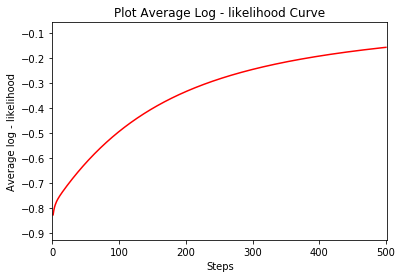


plot log-likelihood of test data (using 
 gradients calculated from training data) vs iterations


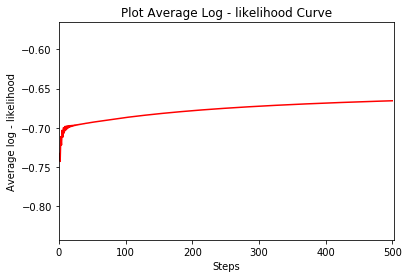

Final training log-likelihood per data point = -0.156118049049
Final test log-likelihood per data point = -0.665459037215

plot probability contours on training data


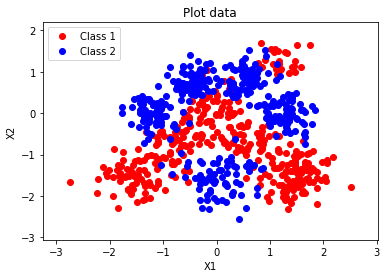


plot probability contours on test data


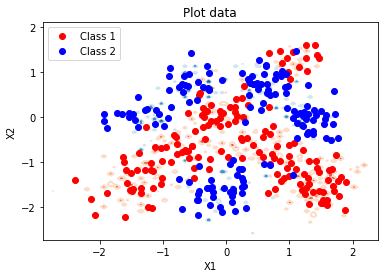

Confusion Matrix:

True negative/total negatives  = 0.9808917197452229   |   False positive/total negatives = 0.01910828025477707
False negative/total positives = 0.8671328671328671   |   True positive/total positives  = 0.13286713286713286

plot log likelihood of training data as 
a function of the number of iterations


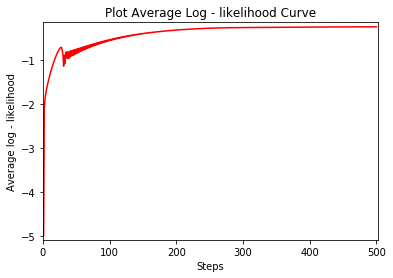


plot log-likelihood of test data (using 
 gradients calculated from training data) vs iterations


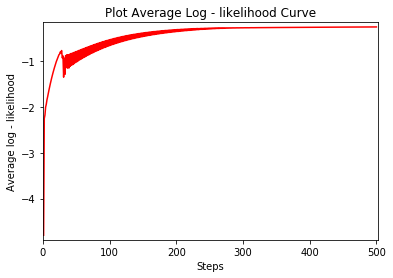

Final training log-likelihood per data point = -0.24765209943
Final test log-likelihood per data point = -0.251057238678

plot probability contours on training data


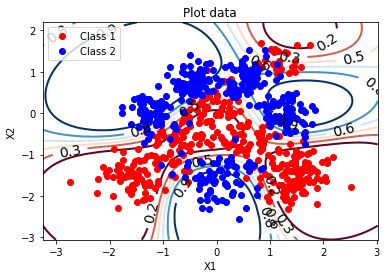


plot probability contours on test data


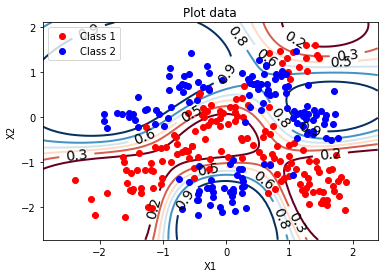

Confusion Matrix:

True negative/total negatives  = 0.8980891719745223   |   False positive/total negatives = 0.10191082802547771
False negative/total positives = 0.06993006993006994   |   True positive/total positives  = 0.9300699300699301

plot log likelihood of training data as 
a function of the number of iterations


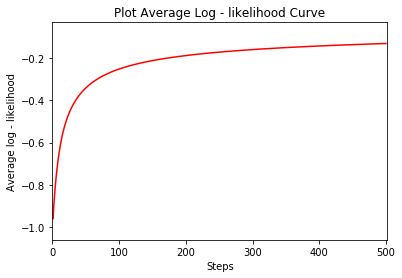


plot log-likelihood of test data (using 
 gradients calculated from training data) vs iterations


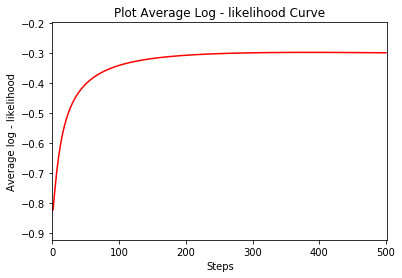

Final training log-likelihood per data point = -0.130911718199
Final test log-likelihood per data point = -0.300166412505

plot probability contours on training data


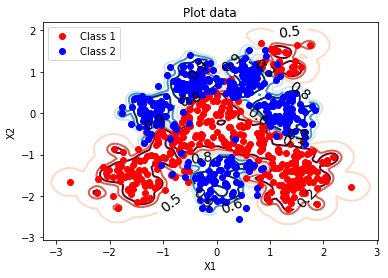


plot probability contours on test data


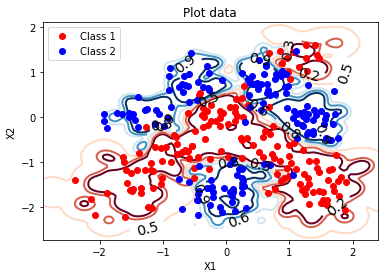

Confusion Matrix:

True negative/total negatives  = 0.8853503184713376   |   False positive/total negatives = 0.11464968152866242
False negative/total positives = 0.08391608391608392   |   True positive/total positives  = 0.916083916083916


In [809]:
##############################
## G & H - Radial basis functions

centers = X_training  ##dont need x_tilde_train since we are interested in coordinates

basis_size = [0.01, 1, 0.1]; learning_rates = [0.013, 0.00026, 0.0055]; i = 0
for l in basis_size:
    X_tilde_rbf_train = np.c_[expand_inputs(l, X_training, centers), np.ones(y_training.shape[0])] #creates "x_tilde" for rfb x's
    X_tilde_rbf_test = np.c_[expand_inputs(l, X_test, centers), np.ones(y_test.shape[0])]   
    
    rate_rbf = learning_rates[i] # learning rate
    #print("ytrain: " + str(y_training.shape) + "   X_tilde_rbf_train: " +str(X_tilde_rbf_train.shape) + "   y_test: " +str(y_test.shape) + "      X_tilde_rbf_test: " + str(X_tilde_rbf_test.shape))
    beta_rbf = train(y_training, X_tilde_rbf_train, y_test, X_tilde_rbf_test, rate_rbf)
    w = beta_rbf
    
    #note that "predict for plot" generates X_tilde therefore only send X_training, not X_tilde_train
    #print("X: " + str(X.shape) + "  y: " +str(y.shape) + "    beta_rbf: " + str(beta_rbf.shape))
    print("\nplot probability contours on training data")
    plot_predictive_distribution(X_training, y_training, predict_for_plot_expanded_features)  #plot linear classifiers on plot
    print("\nplot probability contours on test data")
    plot_predictive_distribution(X_test, y_test, predict_for_plot_expanded_features) 
    confusion_matrix(y_test, X_tilde_rbf_test, beta_rbf)
    
    i = i + 1

The final log-likelihoods for L = 0.1 and L = 1 are far better than the linear classifier. However, L = 0.01 has kernels that are so small that they only cover one result and subsequently over-train the data by default. The classification method in this case is worse than random and also worse than the linear classifier.

Comparing L = 0.1 and L = 1, both are good classifiers; however, L = 0.1 also has the problem of over-fitting the training data and so even though it has a very good final log-likelihood for the test data ($\approx$ -0.13), the test log-likelihood is quite high ($\approx$ -0.31). L = 1 is the best classifier and gives similarly low test and training final log-likelihoods ($\approx$ -0.25). This is good because it means that the classifier hasn't been over-trained and can therefore be used for more general purposes.

The confusion matricies tell the same story, giving L = 1 and L = 0.1 to have almost the same rate of false negatives and false positives. This means that if a hard boundary was drawn both L = 1 and L = 0.1 would have the same classification performance. However, as seen with the log-likelihoods, when a "soft" boundary is used (i.e. with probability contours) the larger kernel performs better.

# Full Technical Report Sections

## Sections A, B & C- Baysian Classification

### Compute the MAP of the posterior

The posterior distribution is given as 
$$\begin{equation}
p(\textbf w \, | \,y,\, \tilde{\textbf X}) \, = \, \frac{p(\textbf y \, | \,\textbf w  \,, \tilde{\textbf X})p(\textbf w)}{p(\textbf y)} \,\, \propto \,\, p(\textbf y \, | \,\textbf w  \,, \tilde{\textbf X})p(\textbf w)
\end{equation}$$ 

where,
$p(\textbf y \, | \,\textbf w  \,, \tilde{\textbf X})$ is the likelihood,
$p(\textbf w) = \frac{1}{Z'}e^{-\frac{1}{2 \sigma_0^2}\textbf{w}^T \textbf{w}}$ is the prior distribution and $Z' = (2\pi\sigma_0^2)^{\frac{M}{2}}$, where M is the number of dimensions. 
$p(\textbf y)$ is the evidence


From before it is easily shown that:

$$\begin{equation}
p(\textbf w \, | \,y,\, \tilde{\textbf X}) \,\, \propto \,\,
\mathcal{L}(\textbf w) + ln(p(\textbf w)) \,\, \propto \,\, 
-(2\pi\sigma_0^2)^{\frac{M}{2}} - \frac{1}{2 \sigma_0^2}\textbf{w}^T \textbf{w} + \sum_{n=0}^{N} \, y_n ln[\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})] \, + \,(1-y_n)ln[1-\sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n})] = ln(\, \mathcal{f}(\textbf{w}) \,)
\end{equation}$$

Therefore we can easily maximise this function:

$$\frac{\partial}{\partial \textbf{w}} ln(\, \mathcal{f}(\textbf{w}) \,) = 0$$

And where this occurs is the Maximum a Posteriori, $\textbf{w}_{MAP}$


Note that scipy.optimize.fmin_l_bfgs_b() function performs minimisation and so the log-posterior and the log-gradient must be negated to get the correct answer

In [810]:
#Logistic posterior. 
def log_post_grad(w_, *args):
    y_ = args[0]; X_ = args[1]; var0 = args[2]
    #beta_.shape = (701,)    y_.shape = (700,)    X_tilde_.shape = (700, 701) as [[1, x01, x02, ... , x0701]; [1, x11, x12, ... , x1701]; ...]
    return -(gradient(X_, y_, w_) - (1/var0)*w_) #subtract the gradient of the prior from the gradient from before

def posterior(y_, X_tilde_, w_, prior_var):
    ##create an array of likelihoods
    sigma = logistic(np.dot(X_tilde_, w_))
    likelihood = np.multiply(y_, np.log(sigma)) + np.multiply((1 - y_), np.log(1-sigma))
    tot_like = np.sum(likelihood) #sum all elements together
    
    #Z' const needed for finding evidence p(y), not necessary for w_MAP - though doesnt affect maximisation process
    prior = -0.5*np.dot(w_, w_)/prior_var - (dim/2)*np.log(2*np.pi*prior_var) 
    print("ln(posterior) = " + str(tot_like + prior) + "     total log likelihood = " + str(tot_like) + "       log prior = " + str(prior))
    
    return tot_like, prior


#the log(likelihood*prior), doesn't include evidence
def f_to_maximise(w_, *args): #log posterior function
    
    y_ = args[0]; X_tilde_ = args[1]; prior_var = args[2]
    #y_.shape = (700,)    X_tilde_.shape = (700, 701) as [[1, x01, x02, ... , x0701]; [1, x11, x12, ... , x1701]; ...]
    prob = -posterior_sans_evidence(y_, X_tilde_, w_, prior_var)
    return prob #need to invert the function since scipy.optimise minimises

In [811]:
#use x_tilde for l = 0.1 and beta_rbf for l = 0.1

init_w = beta_rbf #start with the w for maximum likelihood 
var0 = 1 #this is sigma0 squared

#print("y_training.shape = " + str(y_training.shape) + "     X_tilde_rbf_train.shape = " + str(X_tilde_rbf_train.shape))
w_MAP, j, k = scipy.optimize.fmin_l_bfgs_b(f_to_maximise, x0 = init_w, fprime = log_post_grad, \
                                           args = (y_training, X_tilde_rbf_train, var0), approx_grad=False)

ln(posterior) = -1243.87557453     total log likelihood = -91.6382027396       log prior = -1152.23737179
ln(posterior) = -1214.30563926     total log likelihood = -93.2847754899       log prior = -1121.02086377
ln(posterior) = -1107.89320599     total log likelihood = -101.738374338       log prior = -1006.15483165
ln(posterior) = -1396.72660593     total log likelihood = -701.586069519       log prior = -695.140536416
ln(posterior) = -984.217379867     total log likelihood = -159.528767718       log prior = -824.688612149
ln(posterior) = -1023.81918488     total log likelihood = -352.121520512       log prior = -671.697664363
ln(posterior) = -893.696619517     total log likelihood = -169.359149595       log prior = -724.337469923
ln(posterior) = -886.769611697     total log likelihood = -183.250268129       log prior = -703.519343568
ln(posterior) = -871.648290372     total log likelihood = -176.338430821       log prior = -695.30985955
ln(posterior) = -866.815749308     total log li

The "total likelihood" and the "prior likelihood" are printed (as defined in the function posterior()) above.

If we start with w_init = w_rbf_final, after each iteration, the "total likelihood" decreases and the "prior" probability increases (gets less negative). This is because, as we optimise w for the posterior, the likelihood with this value becomes less optimal, but the log prior probability becomes less of a hinderance to the log posterior probability. The final values give the smallest possible of $$p(\textbf w \, | \,y,\, \tilde{\textbf X})$$ <br>

Which then gives us the value, **w<sub>MAP</sub>**, which acheived that.

### Compute the Laplace Approximation of the Posterior, Plot predictive distribution

We can use the fact that a probit function and a logistic function are very similar to eachother if the correct value of $\lambda$ is used:

$$\sigma(a_n) = \frac{1}{1+e^{-a_n}} \approx \int_{-\infty}^{a_n} \mathcal{N}(u; \, 0,\, \lambda^{-1}) \, du = \int_{-\infty}^{a_n} \frac{\lambda}{\sqrt{2\pi}}e^{-\frac{\lambda^2}{2}u^2} \,\, du  = \Phi(\lambda a_n)$$ <br>

i.e. when $\lambda^2 = \frac{\pi}{8}$ 

we can get a good approximation of the log(posterior), $ln(\, \mathcal{f}(\textbf{w}))$, (as shown above) by applying the laplace approximation. Firstly, we convert all the logistic functions to probit functions so that we have a function in terms of gaussians: <br>

$$\begin{equation}
ln(\, \mathcal{f}(\textbf{w}) \,) \,\, \approx \,\,
-(2\pi\sigma_0^2)^{\frac{M}{2}} - \frac{1}{2 \sigma_0}\textbf{w}^T \textbf{w} + \sum_{n=0}^{N} \, y_n ln[\Phi(\lambda \boldsymbol \beta^T \tilde{\textbf x}_{n})] \, + \,(1-y_n)ln[1-\Phi(\lambda \boldsymbol \beta^T \tilde{\textbf x}_{n})] 
\end{equation}$$

The logarithm of a gaussian is a quadratic function and therefore we can take the taylor expansion of this, centred on $\textbf w_{MAP}$ as an approximation:

$$\begin{equation}
ln(\, \mathcal{f}(\textbf{w}) \,) \,\, \approx \,\,
ln(\, \mathcal{f}(\textbf{w}_{MAP}) \,)-\frac{1}{2}(\textbf{w} - \textbf{w}_{MAP})^T \textbf A (\textbf{w} - \textbf{w}_{MAP})
\end{equation}$$

As derived in Bishop, Pattern Recognition and Machine Learning, Chapter 4.4, where **A** is the hessian of -ln(f(**w**))

Taking the exponential we get:

$$\begin{equation}
\mathcal{f}(\textbf{w} \,) \,\, \approx \,\,
\mathcal{f}(\textbf{w}_{MAP})e^{- \frac{1}{2}(\textbf{w} - \textbf{w}_{MAP})^T \textbf A (\textbf{w} - \textbf{w}_{MAP})}
\end{equation}$$

And can therefore immediatly pick out that the laplacian approximation of the posterior is:

$$\begin{equation}
p(\textbf w \, | \,y,\, \tilde{\textbf X}) \,\, \approx \,\, \frac{\mathcal{f}(\textbf{w} \,)}{Z} \, \approx \, \mathcal{N}(\textbf w; \, \textbf{w}_{MAP},\, \textbf{A}^{-1}) = q(\textbf w)
\end{equation}$$

where $Z \, \approx \, \mathcal{f}(\textbf{w}_{MAP})(2\pi)^{D/2}|\textbf A|^{-0.5}$ as a first approximation. This is easily shown by comparing q(**w**) to a standard gaussian distribution.

The inverse covariance matrix of q(**w**) is given by the hessian of q(**w**) at $\textbf{w}_{MAP}$, <br>
and can be computed using the algotithm:

$$\begin{equation}
\text{Covariance matrix} = \textbf S_n = \textbf A^{-1} = \sum_{n=0}^N \sigma(\textbf w^T \tilde{\textbf x}_{n})(1 - \sigma(\textbf w^T \tilde{\textbf x}_{n}))(\tilde{\textbf x}_{n}\tilde{\textbf x}_{n}^T) + (\sigma_0^2 \textbf I)^{-1}
\end{equation}$$

In [812]:
# Covariance of Laplace approximation Sn
def inv_covariance_matrix(X_, w_, var_):
    S0 = np.zeros((X_.shape[1], X_.shape[1]))
    np.fill_diagonal(S0, 1/var_)

    inv_Sn = np.zeros((X_.shape[1], X_.shape[1]))
        
    for j in range(X_tilde_rbf_train.shape[0]):
        # Use w_MAP to calculate logistics
        sigma = logistic(np.dot(X_[j], w_))
        Sn = Sn + sigma*(1-sigma)*np.outer(X_[j], X_[j])

    Sn = Sn + S0
    
    return Sn;

In [813]:
Sn = covariance_matrix(X_tilde_rbf_train, w_MAP, var0)
#check if positive definite
if np.all(np.linalg.eigvals(Sn) > 0):
    print("Positive Definite!!")
else:
    print("not defined")

Positive Definite!!


In [814]:
def approx_Z(y_, X_tilde_, w_, prior_var):
    
    dim = w_.shape[0]
    tot_like, prior = posterior(y_, X_tilde_, w_, prior_var)
    sign, log_det_Sn = np.linalg.slogdet(covariance_matrix(X_tilde_, w_, prior_var))
    
    
    log_Z = tot_like + prior + dim*np.log(2*np.pi)/2 - 0.5*log_det_Sn
    print(log_Z)
    Z = np.exp(log_Z)
    print(Z)
    return Z

In [815]:
#approximate the evidence, Z
Z = approx_Z(y_training, X_tilde_rbf_train, w_MAP, var0)

ln(posterior) = -864.102069566     total log likelihood = -157.428824159       log prior = -706.673245408
-290.248783456
8.8420907113e-127


An approximate predictive distribution can be obtained from the laplace approximation:

$$\begin{equation}
p(y_{*} \, | \,\tilde{\textbf x}_{*} \,, \textbf{y} ) \approx \int p(y_{*} \, | \,\tilde{\textbf x}_{*} \,, \textbf{w} )q(\textbf w) d \textbf w \,\, \approx \,\,
\sigma \Bigg(\frac{\mu_a}{\sqrt{1 + \lambda^{-2}\sigma_a^2}}\Bigg)
\end{equation} $$

where $\mu_a = \textbf{w}_{MAP}^T \tilde{\textbf X}$  and $ \sigma_a^2 = \tilde{\textbf X}\textbf S_{N}\tilde{\textbf X}^T$ As defined in Bishop, Pattern Recognition and Machine Learning, Chapter 4.5

In [801]:
#Predictive distribution, where features is a new feature vector
#i.e a new feature vector for a new data point that we want to classify/ give a y value to
def predict_for_plot_laplace_features(features, cov_matrix = Sn, w_ = w_MAP, l_ = l):
    
    features_expanded = expand_inputs(l_, features, X_training) 
    features_tilde = np.concatenate((features_expanded, np.ones((features_expanded.shape[ 0 ], 1 ))), 1) #create feature vector
    #print("expanded shape = " +str(features_expanded.shape) + "    expanded feature vector shape = " + str(features_tilde.shape))
    
    #compute parameters of a = w_MAP^T * X_training 
    mu_a = np.dot(features_tilde, w_) #E[a]
    var_a = np.diag(np.dot(features_tilde, np.dot(cov_matrix, np.transpose(features_tilde)))) #Var[a]
    lbda_2 = np.pi/8 #lambda squared as defined above

    kappa = np.power((np.ones(var_a.shape) + lbda_2*(np.multiply(var,var))), -0.5) #this is K(sigma^2)
    
    return logistic(np.multiply(kappa, mu_a))

## Section C & D, Plots and Analysis of results

In [726]:
def compute_baysian_log_likelihood(X_, y_, beta_MAP, S_N, l_):
    
    n = X_.shape[0]
    
    prob_bayesian = predict_for_plot_laplace_features(X_, S_N, beta_MAP, l_)
    #ll_bayesian = y.dot(np.log(prob_bayesian)) + (1 - y).dot(np.log(1.0 - prob_bayesian))
    
    return np.mean (y_ * np.log(prob_bayesian) + (1 - y_) * np.log(1.0 - prob_bayesian))

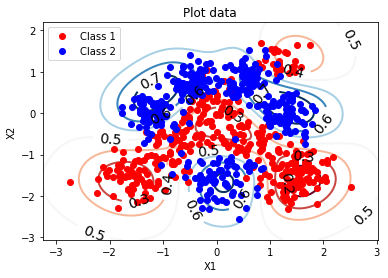

Final training log-likelihood per data point = -0.445895227351


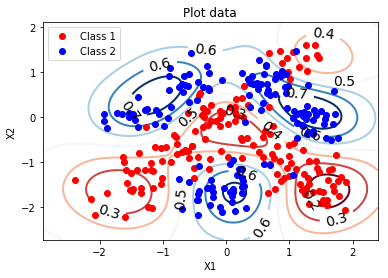

Final test log-likelihood per data point = -0.452611110123
Confusion Matrix:

True negative/total negatives  = 0.9044585987261147   |   False positive/total negatives = 0.09554140127388536
False negative/total positives = 0.055944055944055944   |   True positive/total positives  = 0.9440559440559441


In [805]:
#Plot the baysian (laplace approximated) predictive distribution on data
plot_predictive_distribution(X_training, y_training, predict_for_plot_laplace_features)
print("Final training log-likelihood per data point = " +  str(compute_baysian_log_likelihood(X_training, y_training, w_MAP, Sn, l)))

plot_predictive_distribution(X_test, y_test, predict_for_plot_laplace_features)
print("Final test log-likelihood per data point = " +  str(compute_baysian_log_likelihood(X_test, y_test, w_MAP, Sn, l)))

confusion_matrix(y_test, X_test)

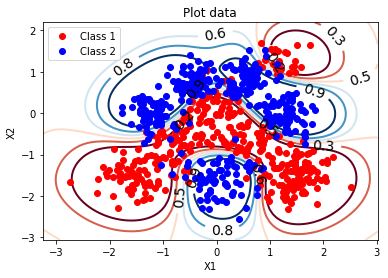

Final training log-likelihood per data point = -0.172443838348


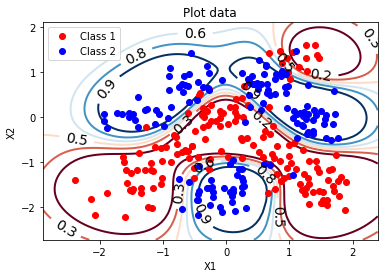

Final test log-likelihood per data point = -0.212736498551
Confusion Matrix:

True negative/total negatives  = 0.9044585987261147   |   False positive/total negatives = 0.09554140127388536
False negative/total positives = 0.055944055944055944   |   True positive/total positives  = 0.9440559440559441


In [806]:
#Plot the MAP solutions on the data
w = w_MAP
plot_predictive_distribution(X_training, y_training, predict_for_plot_expanded_features)
print("Final training log-likelihood per data point = " +  str(compute_average_ll(X_tilde_rbf_train, y_training, w_MAP)))

plot_predictive_distribution(X_test, y_test, predict_for_plot_expanded_features)
print("Final test log-likelihood per data point = " +  str(compute_average_ll(X_tilde_rbf_test, y_test, w_MAP)))

confusion_matrix(y_test, X_tilde_rbf_test, w_MAP)

Both the baysian classifier and the MAP classifier have the same values for their confusion matrix. This is because for both the likelihood = 0.5 contour is the same.

The likelihoods for the MAP estimate; however, are better. This is because the MAP predictive uncertainty is constant along the decision border making the contours much closer together. This means that the data points that are correctly classified contribute strongly to the log-likelihood. The bayesian distribution increases in uncertainty in areas where there is no data and hence, for the data given (since there isn't that much) will perform more poorly - but with new data it is likely to perform better. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This increase in uncertainty where there is less data is most evident near the bottom left corner of the plots. the MAP solution predicts with the highest likelihood that this region is where red data points will be, whereas the bayesian approach only gives this high.

## Section E - Optimising the Model Evidence p(**y**)

Using two previously defined equations:

$$Z \, \approx \, \mathcal{f}(\textbf{w}_{MAP})(2\pi)^{D/2}|\textbf A|^{-0.5}$$ and,

$$\mathcal{f}(\textbf w) = p(\textbf y \, | \, \tilde{\textbf X},  \, \textbf{w})p(\textbf{w})$$

we can combine the two to give:

$$\begin{equation}
Z \, \approx \, p(\textbf y \, | \, \tilde{\textbf X},  \, \textbf{w}_{MAP})p(\textbf{w}_{MAP})(2\pi)^{D/2}|\textbf A|^{-0.5}
\end{equation}$$

Taking the log of this gives:

$$\begin{equation}
ln(Z) \, \approx \, ln(p(\textbf y \, | \, \tilde{\textbf X},  \, \textbf{w}_{MAP})) + \underbrace{ln(p(\textbf{w}_{MAP})) + (D/2)ln(2\pi)-0.5ln|\textbf A|}_{\text{occam factor}}
\end{equation}$$
recalling $ln(\mathcal{f}(\textbf w))$, and that **A** is only a function of $\textbf w_{MAP}, \,\, \tilde{\textbf X} \,\, \text{and} \,\, \sigma_0$

$$\begin{equation}
ln(\, \mathcal{f}(\textbf{w}) \,) \,\, = \,\, ln(p(\textbf y \, |\, \tilde{\textbf X}, \, \textbf w)) \, + \, ln(p(\textbf w))
\end{equation}$$
<br>
Comparing $ln(Z)$ to the $ln(\mathcal{f}(\textbf w))$ we see that only the last two terms of the occam factor are different, and these are constants for a given $\sigma_0$ and $l$. Therefore, when we are maximising the posterior, we are also maximising the evidence.

In [753]:
def Log_evidence_laplace(X_, y_, prior_var, l_):
    
    dim = init_w.shape[0]
    X_expanded = expand_inputs(l_, X_, X_training) 
    X_tilde_ = np.concatenate((X_expanded, np.ones((X_expanded.shape[ 0 ], 1 ))), 1) #create feature vector
    
    beta_MAP, j, k = scipy.optimize.fmin_l_bfgs_b(f_to_maximise, x0 = init_w, fprime = log_post_grad, args = (y_, X_tilde_, prior_var), approx_grad=False)
    
    #find the inverse covariance matrix for these parameters
    Sn_ = covariance_matrix(X_tilde_, beta_MAP, prior_var)
    
    #check if positive definite
    if np.all(np.linalg.eigvals(Sn_) > 0):
        pass
        #print("Positive Definite!!")
    else:
        print("not defined")
        sys.exit()
    
    #compute the natural log of the deterinant of the inverse covariance matrix
    det_sign, log_det_Sn = np.linalg.slogdet(Sn_)
    
    
    tot_likelihood, ln_prior = posterior(y_, X_tilde_, beta_MAP, prior_var)
    occam = ln_prior + (dim/2)*np.log(2*np.pi) - 0.5*log_det_Sn
    
    evidence = tot_likelihood + occam
    
    return evidence

In [808]:
#for var0 = 1 and l = 0.1
Z = Log_evidence_laplace(X_training, y_training, var0, l)
print("log_Z = " + str(Z))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


log_Z = -165.75417884


In [755]:
l_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1, 1.1]
var_array = [0.4, 0.7, 1, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1]

Z_Grid = np.zeros((10,10))

for i in range(len(l_array)):
    for j in range(len(var_array)):
    
        Z = Log_evidence_laplace(X_training, y_training, var_array[j], l_array[i])
    
        print('l: {}   prior variance: {}    Z: {}'.format(l_array[i],var_array[j], Z))
    
        Z_Grid[i][j] = Z

l: 0.1   prior variance: 0.4    Z: -326.13240246632915
l: 0.1   prior variance: 0.7    Z: -302.68773168451503
l: 0.1   prior variance: 1    Z: -290.249577537038
l: 0.1   prior variance: 1.3    Z: -282.52606722518925
l: 0.1   prior variance: 1.6    Z: -277.3100709638877
l: 0.1   prior variance: 1.9    Z: -273.59136770429177
l: 0.1   prior variance: 2.2    Z: -270.8437425906016
l: 0.1   prior variance: 2.5    Z: -268.76994185997563
l: 0.1   prior variance: 2.8    Z: -267.16798811399894
l: 0.1   prior variance: 3.1    Z: -265.9119495896089
l: 0.2   prior variance: 0.4    Z: -210.9715656669333
l: 0.2   prior variance: 0.7    Z: -200.57656732935962
l: 0.2   prior variance: 1    Z: -196.31940136273766
l: 0.2   prior variance: 1.3    Z: -194.23852229248547
l: 0.2   prior variance: 1.6    Z: -193.1714570585603
l: 0.2   prior variance: 1.9    Z: -192.64880753648055
l: 0.2   prior variance: 2.2    Z: -192.4441961975442
l: 0.2   prior variance: 2.5    Z: -192.43805899341925
l: 0.2   prior varianc

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


l: 0.4   prior variance: 0.4    Z: -170.03975429878844
l: 0.4   prior variance: 0.7    Z: -168.37980645019147
l: 0.4   prior variance: 1    Z: -168.73113765626255
l: 0.4   prior variance: 1.3    Z: -169.58455594800392
l: 0.4   prior variance: 1.6    Z: -170.57609168909897
l: 0.4   prior variance: 1.9    Z: -171.58330044379892
l: 0.4   prior variance: 2.2    Z: -172.56168647744522
l: 0.4   prior variance: 2.5    Z: -173.50149475594387
l: 0.4   prior variance: 2.8    Z: -174.3962410638173
l: 0.4   prior variance: 3.1    Z: -175.24816866430186
l: 0.5   prior variance: 0.4    Z: -167.939791370677
l: 0.5   prior variance: 0.7    Z: -165.84601696073108
l: 0.5   prior variance: 1    Z: -165.7541788398613
l: 0.5   prior variance: 1.3    Z: -166.2243924184848
l: 0.5   prior variance: 1.6    Z: -166.88644439305483
l: 0.5   prior variance: 1.9    Z: -167.6210673315691
l: 0.5   prior variance: 2.2    Z: -168.36035140934217
l: 0.5   prior variance: 2.5    Z: -169.10144518908004
l: 0.5   prior varia

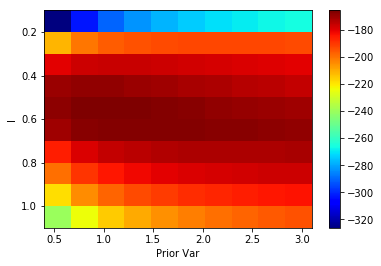

In [759]:
# Make the plot extent = (left, right, bottom, top)
plt.imshow(Z_Grid, extent=[0.4, 3.1, 1.1, 0.1], cmap='jet', aspect='auto')
plt.colorbar()
plt.ylabel('l')
plt.xlabel('Prior Var')
plt.show()

The maximum value for log_Z from this grid search is -165.75 and is given at the point $l = 0.5\pm0.1$ and $\sigma_0^2 = 1\pm0.3$.

# Optimum $\sigma_0^2$ and Kernel Size, $l$

In [802]:
l = 0.5; var0 = 1
X_tilde_rbf_train = np.c_[expand_inputs(l, X_training, centers), np.ones(y_training.shape[0])]
X_tilde_rbf_test = np.c_[expand_inputs(l, X_test, centers), np.ones(y_test.shape[0])]   

w_MAP, j, k = scipy.optimize.fmin_l_bfgs_b(f_to_maximise, x0 = init_w, fprime = log_post_grad, \
                                           args = (y_training, X_tilde_rbf_train, var0), approx_grad=False)

Sn = covariance_matrix(X_tilde_rbf_train, w_MAP, var0)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


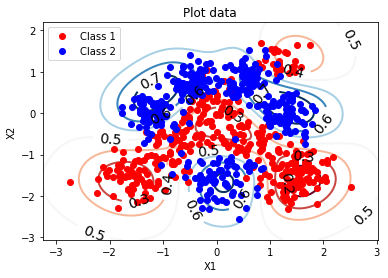

Final training log-likelihood per data point = -0.445895227351


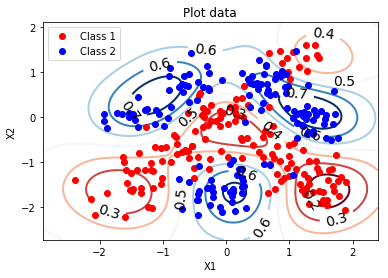

Final test log-likelihood per data point = -0.452611110123
Confusion Matrix:

True negative/total negatives  = 0.9044585987261147   |   False positive/total negatives = 0.09554140127388536
False negative/total positives = 0.055944055944055944   |   True positive/total positives  = 0.9440559440559441


In [803]:
#Plot the baysian (laplace approximated) predictive distribution on data
plot_predictive_distribution(X_training, y_training, predict_for_plot_laplace_features)
print("Final training log-likelihood per data point = " +  str(compute_baysian_log_likelihood(X_training, y_training, w_MAP, Sn, l)))

plot_predictive_distribution(X_test, y_test, predict_for_plot_laplace_features)
print("Final test log-likelihood per data point = " +  str(compute_baysian_log_likelihood(X_test, y_test, w_MAP, Sn, l)))

confusion_matrix(y_test, X_test)

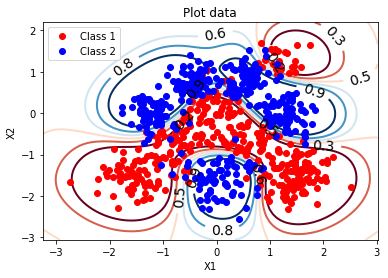

Final training log-likelihood per data point = -0.172443838348


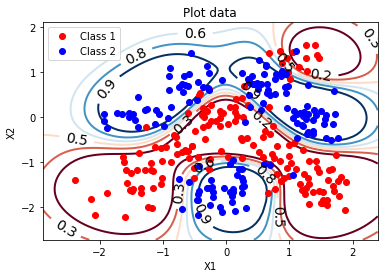

Final test log-likelihood per data point = -0.212736498551
Confusion Matrix:

True negative/total negatives  = 0.9044585987261147   |   False positive/total negatives = 0.09554140127388536
False negative/total positives = 0.055944055944055944   |   True positive/total positives  = 0.9440559440559441


In [804]:
#Plot the MAP solutions on the data
w = w_MAP
plot_predictive_distribution(X_training, y_training, predict_for_plot_expanded_features)
print("Final training log-likelihood per data point = " +  str(compute_average_ll(X_tilde_rbf_train, y_training, w_MAP)))

plot_predictive_distribution(X_test, y_test, predict_for_plot_expanded_features)
print("Final test log-likelihood per data point = " +  str(compute_average_ll(X_tilde_rbf_test, y_test, w_MAP)))

confusion_matrix(y_test, X_tilde_rbf_test, w_MAP)

Using optimal values for $\sigma_0^2$ and $l$ has improved the classification using both the MAP and full bayesian classifiers.

As before, the baysian classifier and the MAP classifier have the same values for their confusion matrix. This is because for both the likelihood = 0.5 contour is the same. The rate of false negatives has decreased from 0.129 to 0.056 (half of what it was) as a result of the kernel size increasing, indicating that the problem of overfitting with $l = 0.1$ has been reduced.

Comparing the likelihoods: <br><br>
$l$ = 0.5, $\sigma_0^2$ = 1 $ \qquad$   Training   $\qquad \qquad$ Test <br>
Baysian: $\qquad \qquad$ -0.446 $\qquad \qquad$ -0.453    <br>
$w_{MAP}$: $\qquad \enspace \qquad$ -0.172 $\qquad \qquad$ -0.213    <br>
<br>

$l$ = 0.1, $\sigma_0^2$ = 1 $ \qquad$   Training   $\qquad \qquad$ Test <br>
Baysian: $\qquad \qquad$ -0.552 $\qquad \qquad$ -0.586    <br>
$w_{MAP}$: $\qquad \enspace \qquad$ -0.225 $\qquad \qquad$ -0.337    <br>

For both baysian and $w_{MAP}$ classifiers, $l$ = 0.5 gives unilaterally better log-likelihood values. This is because the larger kernel size has reduced overfitting: The $l$ = 0.1 plots show that in the middle of clusters there are islands of differing contours that are determined by anomolies within these clusters, wherase the $l$ = 0.5 plots have a smoother classification within obvious clusters, making the assumption that the anomolies within clusters are randomly distributed rather than giving too much significance to them.

These islands mean that datapoints within these clusters are given less weight and so the average log-likelihood for $l$ = 0.1 is less than $l$ = 0.5. In addition to this, the larger kernel size means that at the edge of the datapoints, there is a larger area around the data that is classified as a certain colour, whereas with $l$ = 0.1 the decision border more tighly follows the boundry around the data.

The difference between the MAP and baysian estimates can be explained using the same reasoning as before: the MAP predictive uncertainty is constant along the decision border making the contours much closer together whereas the The bayesian distribution increases in uncertainty in areas where there is no data.

Finally the difference between the training and test likelihoods for $l$ = 0.5 is much smaller than for $l$ = 0.1, again exemplifying that $l$ = 0.1 is overtrained.
